In [83]:
import numpy as np
import cv2
import numpy as np 
from matplotlib import pyplot as plt


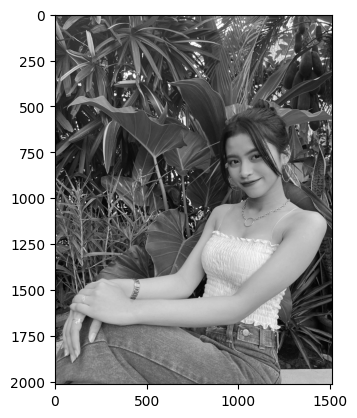

In [84]:
img = cv2.imread("img/img.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

511


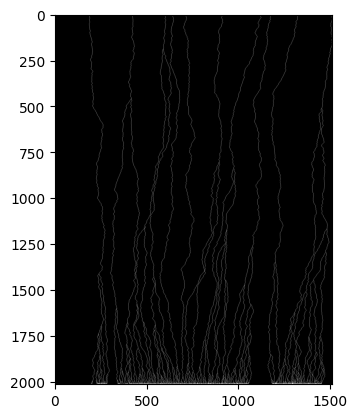

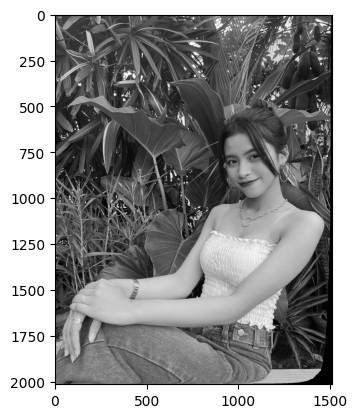

In [85]:

def derivative(X, direction):
    if(direction == 0):
        for idx in range(X.shape[0] - 1):
            X[idx,0:X.shape[1]] = X[idx, 0:X.shape[1]] - X[idx + 1, 0:X.shape[1]]
    else:
        for idx in range(X.shape[1] - 1):
            X[0:X.shape[0], idx] = X[0:X.shape[0], idx] - X[0:X.shape[0], idx + 1]
    return X
    
imgX = derivative(img.copy(), 0)
imgY = derivative(img.copy(), 1)

def energy(X, Y):
    D = X[:] + Y[:]
    return D

energy_matrix = np.array(energy(imgX, imgY))

M = [[0 for x in range(img.shape[1])] for y in range(img.shape[0])]
for idy in range(img.shape[1]):
    M[0][idy] = energy_matrix[0][idy]
for idx in range(1,img.shape[0]):
    for idy in range(img.shape[1]):
        v1 = M[idx-1][idy] if idx-1 >= 0 else 10000000
        v2 = M[idx-1][idy-1] if idx -1 >= 0 and idy - 1 > 0 else 10000000
        v3 = M[idx-1][idy+1] if idx -1 >= 0 and idy + 1 < img.shape[1] else 10000000
        M[idx][idy] = min(v1,v2,v3) + int(energy_matrix[idx][idy])

flag = [0 for x in range(img.shape[1])]
seam_matrix = [[0 for x in range(img.shape[1])] for y in range(img.shape[0])]
def back_tracking(energy_matrix, min_bottom, seam_matrix):
    idy = 0
    min_val = 100000000
    t = img.shape[0] - 1
    for id in range(img.shape[1]):
        if (M[t][id] < min_val) and (M[t][id] >= min_bottom) and flag[id] == 0:
            min_val = M[t][id]
            idy = id
    flag[idy] = 1
    while (t > 0 and idy < img.shape[1] and idy > 0):
        seam_matrix[t][idy] = 255
        v1 = M[t-1][idy] if t - 1 >= 0 else 10000000
        v2 = M[t-1][idy-1] if t -1 >= 0 and idy - 1 > 0 else 10000000
        v3 = M[t-1][idy+1] if t -1 >= 0 and idy + 1 < img.shape[1] else 10000000
        t -= 1
        if(v1 > v2 and v1 > v3):
            continue
        if(v2 > v1 and v2 > v3):
            idy -= 1
            continue
        if(v3 > v1 and v3 > v2):
            idy += 1  
            continue
    return min_val, seam_matrix
pixel = 999
min_val, seam_matrix = back_tracking(M, 0, seam_matrix)
for it in range(999):
    min_val, seam_matrix = back_tracking(M,min_val, seam_matrix)

def result_val(img, seam_matrix):
    result = img.copy()
    for idx in range(result.shape[0]):
        for idy in range(result.shape[1]):
            if seam_matrix[idx][idy] == 255:
                result[idx, idy:] = np.append(result[idx, idy + 1:],0) 
    return result
result = result_val(img, seam_matrix)
plt.imshow(seam_matrix, cmap='gray')
plt.show()
plt.imshow(result, cmap='gray')
plt.show()